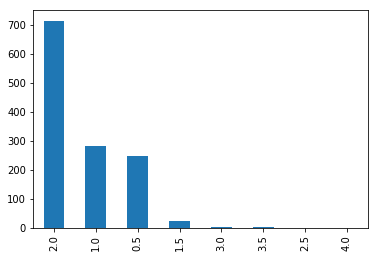

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd 
import json
from datetime import datetime

# media_file_name = "simplerec.json"
media_file_name = "recordings.json"

def show_length(value):
    ''' Find the nearest 30 minute duration multiple to find the actual show length. '''
    durations = [m*30 for m in range(1,11)]
    n = [abs(i-value) for i in durations]
    idx = n.index(min(n))
    return durations[idx]

def remove_list (media_dict):
    for m in media_dict:
        media_dict[m] = media_dict[m][0]
    return media_dict  

def convert_encode_time(media_dict):
    ''' Filter and convert media to a form we can analyze easily. '''
    media_dict_updated = {}
    for m in media_dict:
        if "EncodeTime" in media_dict[m]:
            media_dict_updated[m] = media_dict[m]
            media_dict_updated[m]['EncodeTime'] = datetime.strptime(media_dict_updated[m]['EncodeTime'],
                                                  "%Y:%m:%d %H:%M:%S%z")
    return media_dict_updated        

def filter_convert_media(media_dict):
    ''' Filter and convert media to a form we can analyze easily. '''
    media_dict_updated = {}
    for m in media_dict:
        if "Title" in media_dict[m]:
            media_dict_updated[m] = media_dict[m]
            media_dict_updated[m]['EncodeTime'] = datetime.strptime(media_dict_updated[m]['EncodeTime'],
                                                  "%Y:%m:%d %H:%M:%S%z").astimezone()
            media_dict_updated[m]['MediaOriginalRunTime'] = round(show_length(sum(x * int(t) for x,t in zip ([60,1,0], 
                                                            media_dict_updated[m]['MediaOriginalRunTime'].split(":"))))/60,1) 
    return media_dict_updated

def get_media(json_file_name):
    #Open json file
    with open(media_file_name) as media_file:
        #Returns json obj as a dictionary
        return filter_convert_media(remove_list(json.load(media_file)))

# movie = "2019 Christmas- A First Look Preview Special_HALLHD_2019_07_13_21_00_01.wtv"
# print (get_media(media_file_name)[movie])

df = pd.DataFrame(get_media(media_file_name)).transpose()
# print (df.drop_duplicates(subset='Title'))
# df['MediaOriginalRunTime'].plot(kind='bar')
df['MediaOriginalRunTime'].value_counts().plot(kind='bar')
# plt.show()


In [7]:
# pd.set_option('display.max_rows', None)
print(df.groupby('Title')['MediaOriginalRunTime'].sum().sort_values(ascending = False))

Title
Home & Family                                    522.0
Expedition Unknown                               107.5
Jeopardy!                                         84.0
Restaurant: Impossible                            61.5
Aurora Teagarden Mysteries                        59.5
                                                 ...  
Beat Bobby Flay                                    0.5
A Kitten Christmas                                 0.5
CBS Evening News With Norah O'Donnell              0.5
Rick Steves' Europe                                0.5
Crossword Mysteries & Friends Preview Special      0.5
Name: MediaOriginalRunTime, Length: 376, dtype: float64


In [2]:
pd.set_option('display.max_rows', None)
# df[df['Title'] == 'Expedition Unknown']['MediaOriginalRunTime']

Using matplotlib backend: TkAgg
